# Lab #3 - Decision Tree Classification [AMEO]
---

**Author - Aman Hussain**

**Reg. - 15BCE1077**

**Email - aman.hussain2015@vit.ac.in**
***

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
%matplotlib inline

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz

## Load Data

In [3]:
X = pd.read_csv('../Data/processed/X.csv')
y = pd.read_csv('../Data/processed/y_cat.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                   test_size=0.25, random_state=0,
                                   stratify=y)

## Data Analysis

In [4]:
X_train.head()

,10percentage,12percentage,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,...,Specialization_EC,Specialization_EL,Specialization_ME,Specialization_other,CollegeTier_1,CollegeTier_2,Degree_B.Tech/B.E.,Degree_M.Sc. (Tech.),Degree_M.Tech./M.E.,Degree_MCA
88,87.00,60.00,70.82,640,605,400,0.842248,425,0,469,...,0,0,0,0,0,1,1,0,0,0
735,72.00,68.40,67.84,650,470,680,0.998876,635,0,653,...,0,0,0,0,0,1,1,0,0,0
3070,90.00,89.26,71.00,605,545,585,0.783304,0,388,0,...,1,0,0,0,0,1,1,0,0,0
2784,97.00,95.08,89.00,440,395,545,0.493596,355,324,0,...,1,0,0,0,0,1,1,0,0,0
1013,84.14,73.61,76.09,445,475,595,0.793581,495,0,0,...,0,0,0,0,1,0,1,0,0,0


In [5]:
salary_classes = y_train['Salary'].unique()
print(salary_classes)

['(180000, 300000]' '(300000, 370000]' '(370000, 4000000]'
 '[35000, 180000]']


## Train Decision Tree

In [6]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, presort=True)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=True, random_state=None, splitter='best')

## Visualize the Decision Tree

In [7]:
export_graphviz(clf, out_file='Figures/decisiontree_ameo.dot',
                class_names=salary_classes, rounded=True, filled=True)

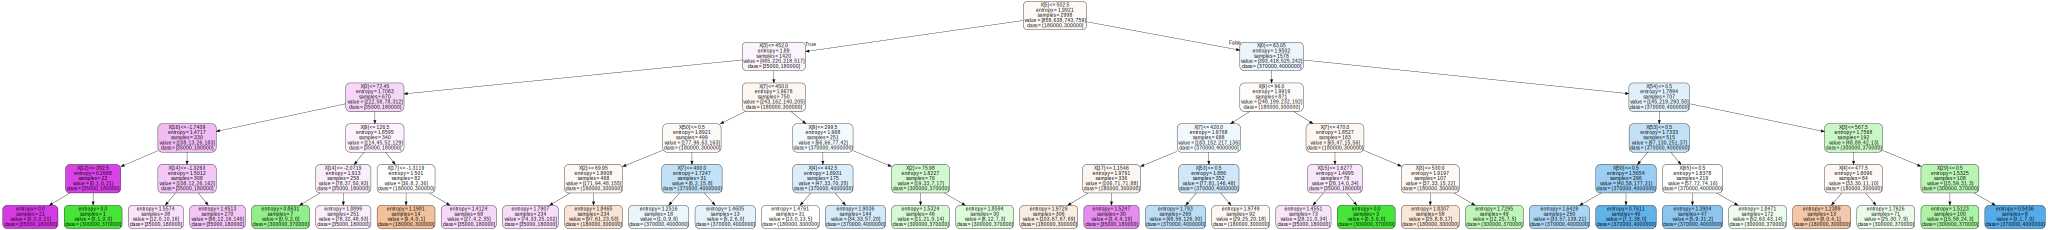

In [8]:
with open('Figures/decisiontree_ameo.dot', 'r') as f:
    tree_graph = f.read()
graphviz.render(engine='dot', format='png', filepath='Figures/decisiontree_ameo.dot')
graphviz.Source(tree_graph, engine='dot', format='png')

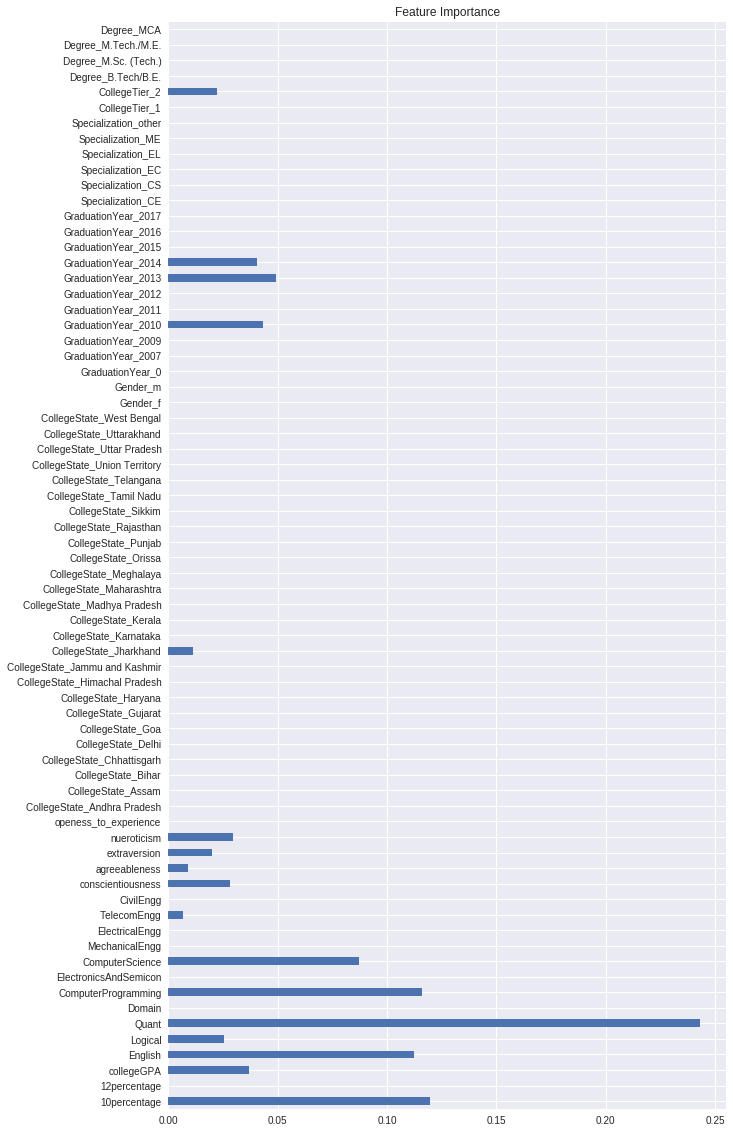

In [9]:
features_importance = pd.DataFrame(data=clf.feature_importances_.T,index=X_train.columns)
features_importance.plot.barh(figsize=(10,20), title='Feature Importance', legend=None)

## Classifier Performance

In [10]:
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

In [11]:
print('Score on training set: {:.2f}'.format(train_score))
print('Score on test set: {:.2f}'.format(test_score))

Score on training set: 0.46
Score on test set: 0.39


In [12]:
def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=15)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 84  45  54 103]
 [ 64  65  46  38]
 [ 55  32 119  42]
 [ 61  22  44 126]]


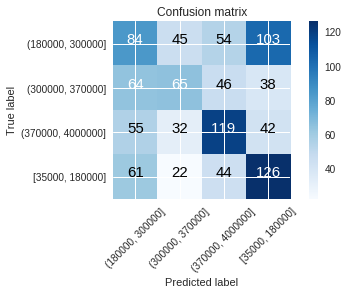

In [13]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, clf.predict(X_test))
plot_confusion_matrix(cnf_matrix, classes=salary_classes)

In [14]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, clf.predict(X_test),average='weighted')
print('F1 Score: {:.2f}'.format(f1))

F1 Score: 0.39


## Conclusion
---

**Here, we can have classified the candidates into four salary slabs with a F1 score of 39%.**